In [152]:
import snap
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
import time

In [153]:
#load a graph G
node = 1005
# G1 = np.loadtxt('test_10nodes.txt', delimiter='\t', skiprows=3, dtype="int")
# G1= np.loadtxt('facebook_combined.txt', delimiter=' ', dtype="int")
# G1 = G1.tolist()
G1 = snap.LoadEdgeList(snap.TNGraph, "email-Eu-core-department-labels.txt", 0, 1)

# FIn = snap.TFIn("small_acyclic.graph")
# G1 = snap.TNGraph.Load(FIn)

# select k nodes
k = 50

In [154]:
# labels = {}
# for NI in G1.Nodes():
#         labels[NI.GetId()] = str(NI.GetId())
# G1.DrawGViz(snap.gvlDot, "output.png", " ", labels)

In [155]:
#build up G's weight w
W = [[0]*node for i in range(node)]
for NI in G1.Nodes():
    for Id in NI.GetOutEdges():
        W[NI.GetId()][Id]=1
#         W[NI.GetId()][Id]=random.random()

In [156]:
#build up internal opinion s
s = np.loadtxt('internal_opinion_email-Eu-core-department-labels.txt', dtype="float")
s = s.tolist()

In [157]:
def equilibrium(z, W):
    z_prev = copy.deepcopy(z)
    cost = [0 for n in range(node)] #c_i(z)
    cost_prev = [0 for n in range(node)] 

    max_round = 10000

    for i in range(max_round):
        
        for NI in G1.Nodes():
            temp_zi_zj_sum = 0   #sum(w_ij(z_i-z_j)^2) ==> 3.1
            temp_z_neighbor = 0   #sum(w_ij z_j) ==> 3.2
            temp_neighbor_weight = 0  #sum(w_ij) ==>3.2

            for Id in NI.GetOutEdges():
                temp_zi_zj_sum += W[NI.GetId()][Id]*(z[NI.GetId()]-z[Id])**2 #3.1
                temp_z_neighbor += W[NI.GetId()][Id]*z_prev[Id] #3.2
                temp_neighbor_weight += W[NI.GetId()][Id] #3.2
                
            cost[NI.GetId()] = (s[NI.GetId()]-z[NI.GetId()])**2 + temp_zi_zj_sum #3.1

            if z[NI.GetId()]==1:
                z[NI.GetId()] = 1
            else:
                z[NI.GetId()] = (s[NI.GetId()]+temp_z_neighbor)/(1+temp_neighbor_weight) #3.2
#         print(z)
        if abs(sum(cost_prev)-sum(cost))<0.00000000000001:
            break

        cost_prev = copy.deepcopy(cost)
        z_prev = copy.deepcopy(z)
    return z

In [158]:
z = copy.deepcopy(s)
a = equilibrium(z, W)
print(a, sum(a))

[0.5497885958574181, 0.12810495867704674, 0.6466208838677604, 0.6776683362323213, 0.5260798452087309, 0.4667120673445765, 0.714241332955472, 0.30669426739249334, 0.6747574530693805, 0.3386285665983213, 0.5722111161973055, 0.7336110012290035, 0.7014713242948324, 0.8056643136895187, 0.6072953688807905, 0.22890244589107744, 0.6276826149676586, 0.45652410664359944, 0.3811886995360158, 0.7005532597300907, 0.2891104361093607, 0.49050381372140767, 0.6382915033902368, 0.8135591488781407, 0.7493302614940647, 0.4693992745964687, 0.6500424041513289, 0.5630948528060362, 0.6506315202353179, 0.6098546040417733, 0.43248325161736556, 0.8136754294350701, 0.7602508037358762, 0.8186676319543227, 0.5558183531831485, 0.6041543902090314, 0.4541193902291388, 0.5840838710824463, 0.8667570891096572, 0.6619890797972524, 0.4862614446627049, 0.25336323661183463, 0.3360432439109966, 0.7302606646279686, 0.7953835336879542, 0.28872904271809774, 0.6612349293293869, 0.3385513970340806, 0.4752278518243013, 0.7001900305

In [159]:
z = copy.deepcopy(s)
selected = set()
gz_every_k = []

start = time.perf_counter()

for i in range(k):
    temp = copy.deepcopy(z)
#     print(temp)
    GZ = []
    z_list = []
    for j in range(node):
        temp[j] = 1
        gz = sum(equilibrium(temp, W))
        z_list.append(equilibrium(temp, W))
        GZ.append(gz)
        temp = copy.deepcopy(z)
    print("k = ",i+1)
    print("g(z) =", max(GZ))
    gz_every_k.append(max(GZ))
    max_index = GZ.index(max(GZ))
    selected.add(max_index)
    z = z_list[max_index]
    z[max_index] = 1
#     print('z = ',z)
#     print("The node you choose this round: node",max_index,'\n')
print("Nodes have been choosen:",selected)
end = time.perf_counter()
print('time: ',end - start)

k =  1
g(z) = 573.3232297771885
k =  2
g(z) = 626.6178141780535
k =  3
g(z) = 656.0696723407382
k =  4
g(z) = 672.7927437968082
k =  5
g(z) = 688.5567719194864
k =  6
g(z) = 701.7260374712558
k =  7
g(z) = 708.5367244113293
k =  8
g(z) = 715.0633065509163
k =  9
g(z) = 720.4357599748092
k =  10
g(z) = 725.1933354490687
k =  11
g(z) = 728.7652062928496
k =  12
g(z) = 731.806837070368
k =  13
g(z) = 734.6207065548813
k =  14
g(z) = 737.2218637124395
k =  15
g(z) = 739.6249975634619
k =  16
g(z) = 741.6530561453849
k =  17
g(z) = 743.643671070973
k =  18
g(z) = 745.613554399014
k =  19
g(z) = 747.5490651075227
k =  20
g(z) = 749.3713289943735
k =  21
g(z) = 750.969292577383
k =  22
g(z) = 752.3226400067788
k =  23
g(z) = 753.6256067537702
k =  24
g(z) = 754.7672389216257
k =  25
g(z) = 755.8481088235218
k =  26
g(z) = 756.8080944176428
k =  27
g(z) = 757.7074225556474
k =  28
g(z) = 758.4794946558245
k =  29
g(z) = 759.0712807937822
k =  30
g(z) = 759.6573316266147
k =  31
g(z) = 760.2227

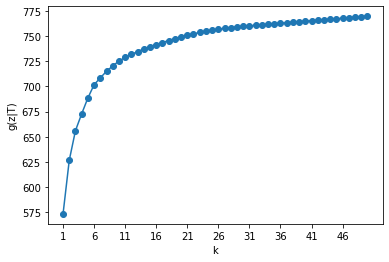

In [160]:
x = np.arange(1,k+1)
plt.plot(x, gz_every_k,marker = 'o')
plt.ylabel('g(z|T)')
plt.xlabel('k')
plt.xticks(range(1, k, 5))
plt.show()

In [161]:
# from itertools import combinations
# node_num = []
# for i in range(node):
#     node_num.append(i)
# start_2 = time.perf_counter()
# Comb = tuple(combinations(node_num, k)) #把所有選k個點的組合挑出來

In [162]:
# All_gz = []
# for i in range(len(Comb)):   #每一格組合
#     temp = copy.deepcopy(s)
#     for j in range(k):       #把選中的點s值改成1
#         temp[Comb[i][j]] = 1
#     gz2 = equilibrium(temp,W)
#     gz = sum(gz2) #選完點後算出這個選擇的結果
#     print(gz,Comb[i], gz2)
#     All_gz.append(gz)
# print('g(z|T)=', max(All_gz)) #選出最大的結果
# end_2 = time.perf_counter()
# print('time: ',end_2 - start_2)